# **Предисловие**

**SOS!!! Спасите наши ...**

***Никогда не бойся делать то, что ты не умеешь. Помни, ковчег был построен любителем — профессионалы построили «Титаник»***


### **Импорт библиотек**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Variable Description
- `PassengerId`: unique id number to each passenger
- `Survived`: passenger survive(1) or died(0)
- `Pclass`: passenger class
- `Name`: name
- `Sex`: gender of passenger
- `Age`: age of passenger
- `SibSp`: number of siblings/spouses
- `Parch`: number of parents/children
- `Ticket`: ticket number
- `Fare`: amount of money spent on ticket
- `Cabin`: cabin category
- `Embarked`: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

### Задание 1
1. Загрузить данные в виде датафрейма в переменную `titanic`
2. Выведите информацию и статистику по датафрейму.

In [5]:
titanic = pd.read_csv('titanic.csv')
#titanic.head()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Задание 2
1. Выведите часть датафрейма, в строках которого пропущено хотябы одно значение.
2. Выведите его размерность.

In [16]:
titanic_NA = titanic[titanic.isna().any(axis=1)]
display(titanic_NA.head())
print('Размерность', titanic_NA.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Размерность (708, 12)


### Задание 3
Найдите и выведите имена столбцов, в которых пропущенных данных более 50%

In [28]:
# Кривой вариант 

# # создадим пустой списочек 
# missing_columns = [] 
# # возьмем лайфхаки с семинара 
# for columns in titanic_NA.columns: 
#     if (titanic[columns].isna().sum() / len(titanic)) > 0.5:
#         missing_columns.append(columns)
# print('имя столбца, где пропущено более 50%', missing_columns)

# Хороший вариант 
missing_ratio = titanic.isna().sum() / len(titanic)
high_missing_cols = missing_ratio[missing_ratio > 0.5].index.tolist()
print("Столбцы с более чем 50% пропусков:", high_missing_cols)
for col, ratio in missing_ratio[high_missing_cols].items():
    print(f"{col}: {ratio:.2%}")

Столбцы с более чем 50% пропусков: ['Cabin']
Cabin: 77.10%


### Задание 4
Постройте сводную таблицу количества выживщих в зависимости от пола (строки) и порта посадки (колонки). Название порта должно быть полным, для переименования кода порта использовать словарь. 

In [26]:
titanic_clean = titanic.dropna(subset=['Sex', 'Embarked', 'Survived']).copy()
embarked_map = {
    'C': 'Cherbourg',
    'Q': 'Queenstown',
    'S': 'Southampton'
}
titanic_clean['Embarked'] = titanic_clean['Embarked'].map(embarked_map)
survivors = titanic_clean[titanic_clean['Survived'] == 1]
pivot = survivors.pivot_table(
    index='Sex',
    columns='Embarked',
    values='Survived',
    aggfunc='count',    
    fill_value=0
)
display(pivot)

Embarked,Cherbourg,Queenstown,Southampton
Sex,,,
female,64,27,140
male,29,3,77


### Задание 5

Найдите вероятность выживания пассажира в зависимости от класса размещения пассажира, упорядочено по классу пассажира. Результат в виде датафрейма.

In [30]:
df = titanic.dropna(subset=['Pclass', 'Survived'])
survival_by_class = (
    df.groupby('Pclass')['Survived'].mean().mul(100).round(2).sort_index()   
)
display(survival_by_class)

Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64

### Задание 6

Постройте `sns.violinplot` для визуализации расходов на билеты в зависимости от порта отправления (на одном графике).

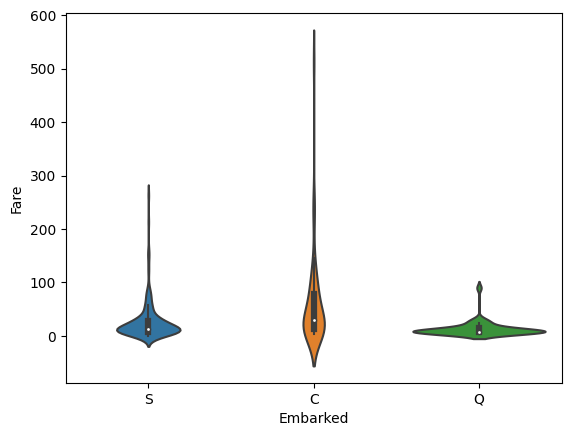

In [31]:
clean = titanic.dropna(subset = ['Fare', 'Embarked'])
# чуток почистили данные 
sns.violinplot(x='Embarked', y='Fare', data=clean)
plt.show()

### Задание 7

Постройте `matplotlib.boxplot` для визуализации расходов на билеты в зависимости от класса пассажира (на одном графике). Ограничить диапазон графика от 0 до 200$.

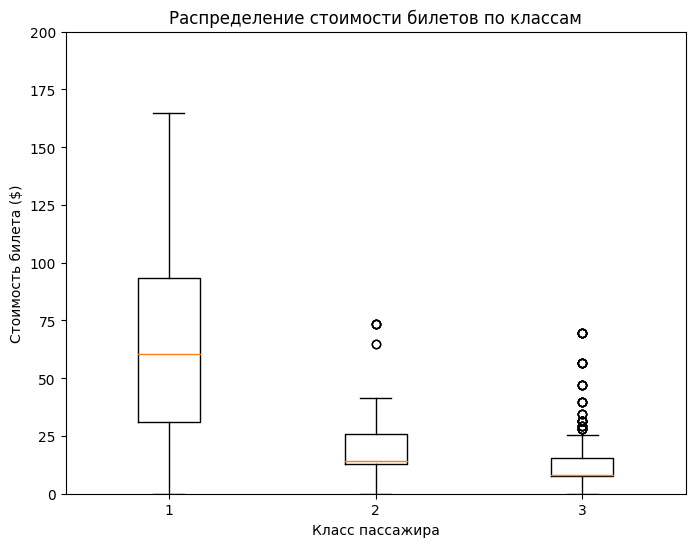

In [32]:
df = titanic.dropna(subset=['Fare', 'Pclass'])
data = [df[df['Pclass'] == cls]['Fare'] for cls in sorted(df['Pclass'].unique())]

fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(data, labels=sorted(df['Pclass'].unique()))
ax.set_title('Распределение стоимости билетов по классам')
ax.set_xlabel('Класс пассажира')
ax.set_ylabel('Стоимость билета ($)')
ax.set_ylim(0, 200)
plt.show()


### Задание 8

Визуализируйте корреляционную матрицу для столбцов `["Survived", "Age", "Fare", "SibSp", "Parch" ]`. Максимально корректно для восприятия.

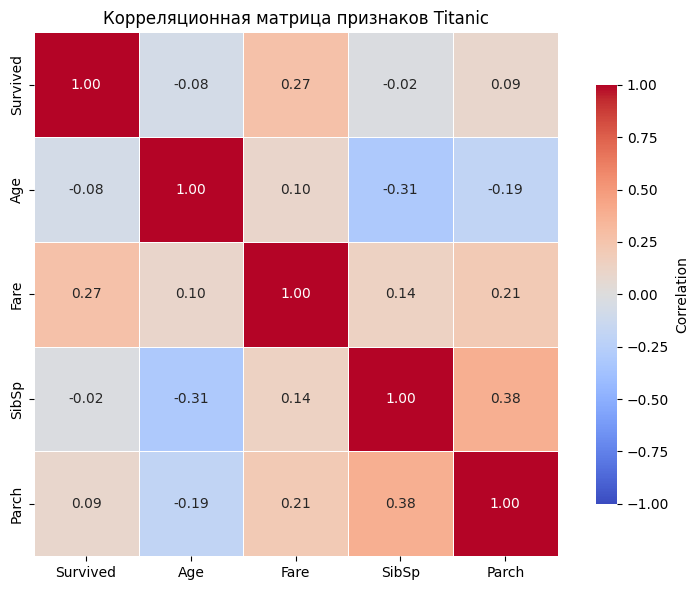

In [35]:
cols = ["Survived", "Age", "Fare", "SibSp", "Parch"]
df = titanic[cols].dropna()
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,           
    fmt=".2f",            
    cmap="coolwarm",      
    vmin=-1, vmax=1,      
    square=True,          
    linewidths=0.5,       
    cbar_kws={"shrink": 0.8, "label": "Correlation"}
)
plt.title("Корреляционная матрица признаков Titanic")
plt.tight_layout()
plt.show()

### Задание 9-10
Используя линии (отрезки) визуализтровать вероятность выживания в зависимости от пола (на соседних графиках) пассажиров различных классов в зависимости от диапазона возраста (диапазон от 0 до 90 с шагом в 10 лет, левая граница не включена, правая включена). 


/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_15007/3955170600.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_bin'] = pd.cut(
/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_15007/3955170600.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Pclass','Sex','age_bin'])['Survived']


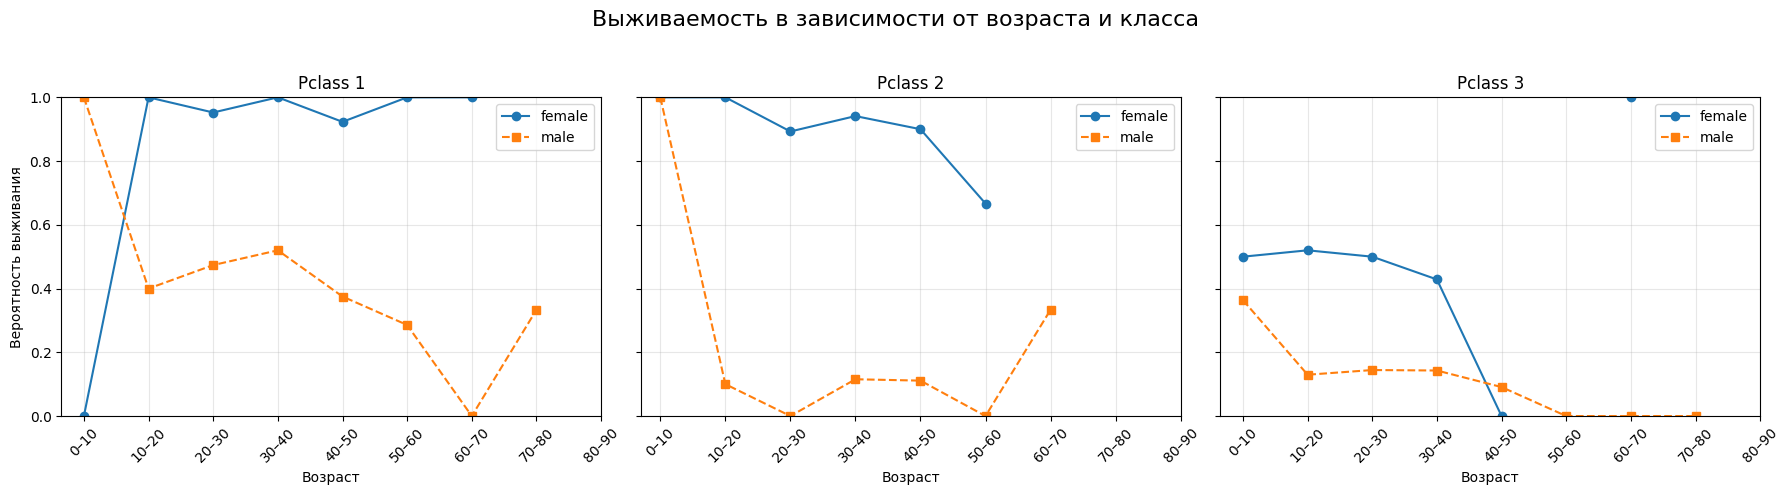

In [37]:
df = titanic.dropna(subset=['Age', 'Sex', 'Pclass', 'Survived'])

# бины..., что-то тырим со StackOverFlow 
bins = list(range(0, 91, 10))
labels = [f'{bins[i]}–{bins[i+1]}' for i in range(len(bins)-1)]
df['age_bin'] = pd.cut(
    df['Age'],
    bins=bins,
    labels=labels,
    right=True,        
    include_lowest=False  
)

# Группируем и считаем долю выживших
grp = (
    df
    .groupby(['Pclass','Sex','age_bin'])['Survived']
    .mean()
    .reset_index()
)


classes = sorted(df['Pclass'].unique())
fig, axes = plt.subplots(
    nrows=1, ncols=len(classes),
    figsize=(18,5),
    sharey=True
)

for ax, cls in zip(axes, classes):
    # Пивотим для удобства рисования
    data = grp[grp['Pclass']==cls].pivot(
        index='age_bin', columns='Sex', values='Survived'
    )
    # Рисуем линии
    ax.plot(data.index, data['female'], marker='o', linestyle='-', label='female')
    ax.plot(data.index, data['male'],   marker='s', linestyle='--', label='male')
    ax.set_title(f'Pclass {cls}')
    ax.set_xlabel('Возраст')
    ax.set_xticks(labels)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_ylim(0,1)
    ax.grid(True, alpha=0.3)
    if cls == classes[0]:
        ax.set_ylabel('Вероятность выживания')
    ax.legend()

plt.suptitle('Выживаемость в зависимости от возраста и класса', fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()